In [54]:
# PCA for feature reduction
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [67]:
url = ("https://raw.githubusercontent.com/CSfromCS/VHS-Thesis/0a668228516a615aa5ff9c047a1a05a5531d62ea/datatocsv2.csv")
df = pd.read_csv(url, parse_dates=True)
# rename column
df.rename(columns={'Time to Next': 'y'}, inplace=True)
print(df.shape)
df.head()

(1047, 14)


,Sec of Day,Hour,Min,Sec,Day of Week,To Station,Round,Lat,Long,isStop,Next Lat,Next Long,Abs Distance,y
0,42568,11,49,28,2,B,1,14.789184,121.907888,0,15.0,121.5,0.459147,42808
1,42688,11,51,28,2,B,1,14.989573,121.601580,1,15.0,121.5,0.102114,42808
2,42808,11,53,28,2,C,1,14.998523,121.461603,1,14.5,121.0,0.679413,43048
3,42928,11,55,28,2,C,1,14.801528,121.101150,0,14.5,121.0,0.318041,43048
4,43048,11,57,28,2,D,1,14.337534,121.027131,0,14.0,121.5,0.580977,43288


In [62]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df.drop('y', axis=1), df[['y']]

# get dummies
X = pd.get_dummies(X)

X = pd.get_dummies(X, columns=['Day of Week'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
X_train.dtypes

Sec of Day         int64
Hour               int64
Min                int64
Sec                int64
Round              int64
Lat              float64
Long             float64
isStop             int64
Next Lat         float64
Next Long        float64
Abs Distance     float64
To Station_A       uint8
To Station_B       uint8
To Station_C       uint8
To Station_D       uint8
Day of Week_2      uint8
Day of Week_3      uint8
Day of Week_4      uint8
Day of Week_5      uint8
Day of Week_6      uint8
dtype: object

In [129]:

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_train)


In [105]:
# print X_reduced as pd
X_reduced = pd.DataFrame(X_reduced)
X_reduced


,0
0,4338.682520
1,-11077.319552
2,-6847.311990
3,-701.318766
4,147.680669
...,...
780,-3997.318942
781,3018.681636
782,-4772.320558
783,-3941.318908


In [86]:
from sklearn.linear_model import LinearRegression

#fit regression model
X_temp = X
y_temp = y
model = LinearRegression()
model.fit(X_temp, y_temp)

#display adjusted R-squared
print(1 - (1-model.score(X_temp, y_temp))*(len(y_temp)-1)/(len(y_temp)-X_temp.shape[1]-1))

#fit regression model
X_temp = X_train
y_temp = y_train
model = LinearRegression()
model.fit(X_temp, y_temp)

#display adjusted R-squared
print(1 - (1-model.score(X_temp, y_temp))*(len(y_temp)-1)/(len(y_temp)-X_temp.shape[1]-1))

#fit regression model
X_temp = X_reduced
y_temp = y_train
model = LinearRegression()
model.fit(X_temp, y_temp)

#display adjusted R-squared
print(1 - (1-model.score(X_temp, y_temp))*(len(y_temp)-1)/(len(y_temp)-X_temp.shape[1]-1))



0.9999091004501867
0.9999074498660393
0.9997957798583523


# Summary

helo


In [213]:
# PCA for feature reduction
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
url = ("https://raw.githubusercontent.com/CSfromCS/VHS-Thesis/0a668228516a615aa5ff9c047a1a05a5531d62ea/datatocsv2.csv")
df = pd.read_csv(url, parse_dates=True)
# rename column
df.rename(columns={'Time to Next': 'y'}, inplace=True)

# Extract feature and target arrays
X, y = df.drop('y', axis=1), df[['y']]

# get dummies
X = pd.get_dummies(X)

X = pd.get_dummies(X, columns=['Day of Week'])

#minmax all columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)
y[:] = scaler.fit_transform(y)
# Split the data

ar2_scores = []

for i in range(1,21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)


    pca = PCA(n_components=i)

    X_train = pca.fit_transform(X_train)
    X_train = pd.DataFrame(X_train)

    X_test = pca.transform(X_test)
    X_test = pd.DataFrame(X_test)


    from sklearn.linear_model import LinearRegression

    #fit regression model
    X_temp = X_test
    y_temp = y_test
    model = LinearRegression()
    model.fit(X_temp, y_temp)

    #display adjusted R-squared
    ar2 = 1 - (1-model.score(X_temp, y_temp))*(len(y_temp)-1)/(len(y_temp)-X_temp.shape[1]-1)
    print(i, ar2)
    ar2_scores.append(ar2)

1 -0.0018536865582721163
2 0.0026091034332842433
3 0.6164472594557118
4 0.6509842405311861
5 0.6855588710294322
6 0.686624029733603
7 0.700008206023295
8 0.7029795696102892
9 0.9354119792874072
10 0.9447109587060291
11 0.9461356603537642
12 0.9832841609899728
13 0.9833152831328158
14 0.9836282866037422
15 0.9999088930629504
16 0.9999082469144607
17 0.9999075915352782
18 0.9999069267261795
19 0.9999062522821663
20 0.9999055679922552


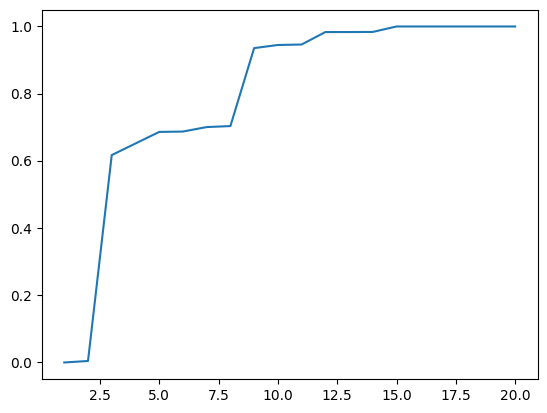

In [214]:
# plot ar2 scores
plt.plot(range(1,21), ar2_scores)
plt.show()

In [190]:
from sklearn.linear_model import LinearRegression

#fit regression model
X_temp = X_test
y_temp = y_test
model = LinearRegression()
model.fit(X_temp, y_temp)

#display adjusted R-squared
print(1 - (1-model.score(X_temp, y_temp))*(len(y_temp)-1)/(len(y_temp)-X_temp.shape[1]-1))

0.6866240297336028


1 : 18.26724%
2 : 17.61224%
3 : 13.38069%
4 : 9.67636%
5 : 9.33009%
6 : 8.53028%
7 : 4.94278%
8 : 4.90413%
9 : 3.84024%
10 : 3.24856%
11 : 2.90846%
12 : 1.97211%
13 : 0.65643%
14 : 0.59906%
15 : 0.13132%
16 : 0.00000%
17 : 0.00000%
18 : 0.00000%
19 : 0.00000%
20 : 0.00000%


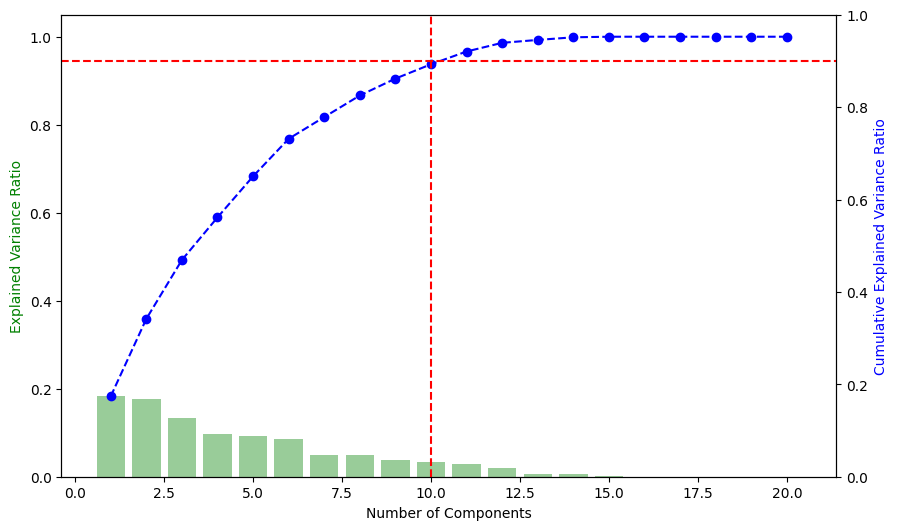

In [221]:
for i, v in enumerate(pca.explained_variance_ratio_):
    print(i+1,":", f"{v*100:.5f}%")

# make a twin x plot with the cumulative variance and the variance explained
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.4, color='g')
# ladder plot
ax1.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), color='b', marker='o', linestyle='--')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance Ratio', color='g')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='b')

# plot at 90% variance
plt.axhline(y=0.9, color='r', linestyle='--')
# plot when ax2 meets line
plt.axvline(x=10, color='r', linestyle='--')
plt.show()

